<a href="https://colab.research.google.com/github/kartikeyahl/MS_analysis/blob/main/WFO2latest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
import math
import concurrent.futures as ft
import multiprocessing
import random
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
# Importing the excel
def loadData():
  global dataset,dataset2,dataset3
  # !unzip punch_short.xlsx
  dataset = pd.read_excel('Punch_short.xlsx',parse_dates=['Date'],
      date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d'))
  dataset2=pd.read_excel('Master Data.xlsx')
  dataset3=pd.read_excel('hmsi calendar 2023.xlsx')

with ft.ThreadPoolExecutor() as executor:
  executor.submit(loadData)

In [3]:
#Renaming column name to a valid column name format as per python
dataset.rename(columns={'IN/OUT': 'IN_OUT'}, inplace=True)
dataset3['MONTHDATEYEAR'] = pd.to_datetime(dataset3['MONTHDATEYEAR'])

In [4]:
#Droping rows that conatain 1  and 'Withdrawn' in 'IN_OUT' and 'Status' column
dataset=dataset[dataset.IN_OUT!=1]
dataset=dataset[dataset.IN_OUT!='P20']
dataset2=dataset2[dataset2.Status!='Withdrawn']

In [7]:
month = (dataset.iloc[0]['Date']).month
groupby_month = dataset3.groupby(pd.Grouper(key='MONTHDATEYEAR', freq='M'),as_index=False).sum()

daydiff = (dataset.iloc[-1]['Date']).day-(dataset.iloc[0]['Date']).day+1

start_date = pd.to_datetime(dataset.iloc[0]['Date'])
end_date = pd.to_datetime(dataset.iloc[-1]['Date'])
working_days = dataset3.loc[(dataset3['MONTHDATEYEAR'] >=start_date) & (dataset3['MONTHDATEYEAR'] <= end_date), 'ISWORKINGDAY'].sum()

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset = dataset.groupby(['E.Code']).size().reset_index(name='counts')

In [10]:
ll1=[]
def binarySearch(arr, l, r, x):

	while l <= r:

		mid = l + (r - l) // 2

		# Check if x is present at mid
		if arr[mid] == x:
			return mid

		# If x is greater, ignore left half
		elif arr[mid] < x:
			l = mid + 1

		# If x is smaller, ignore right half
		else:
			r = mid - 1

	# If we reach here, then the element
	# was not present
	return -1


# Driver Code
arr = [int(i) for i in dataset2['E Code']]

for i in range(len(dataset)):
  # Function call
  result = binarySearch(arr, 0, len(arr)-1, dataset.iloc[i]['E.Code'])

  if result != -1:
      ll1.append([dataset2.iloc[result]['E Code'],dataset2.iloc[result]['Full Name'], dataset2.iloc[result]['Designation'],dataset2.iloc[result]['Location'],dataset2.iloc[result]['Operation'],dataset2.iloc[result]['Division'],dataset2.iloc[result]['Department']])
  else:
      ll1.append(['NaN','NaN','NaN','NaN','NaN','NaN','NaN'])

In [11]:
result_who = pd.DataFrame(ll1, columns=['E.Code','Full Name','Designation','Location','Operation','Division','Department'])
result_wfo =  pd.concat([result_who[['E.Code','Full Name','Designation','Location','Operation','Division','Department']],dataset['counts']], axis=1)

In [ ]:
result_wfo_opr = result_wfo.groupby('Operation',as_index=False).sum()
result_wfo_opr_manpower = dataset2.groupby(['Operation']).size().reset_index(name='opr Manpower')
result_wfo_opr_manpower=result_wfo_opr_manpower.set_index('Operation').T.to_dict('list')

result_wfo_div = result_wfo.groupby('Division',as_index=False).sum()
result_wfo_div_manpower = dataset2.groupby(['Division']).size().reset_index(name='div Manpower')
result_wfo_div_manpower=result_wfo_div_manpower.set_index('Division').T.to_dict('list')

result_wfo_loc = result_wfo.groupby('Location',as_index=False).sum()
result_wfo_loc_manpower = dataset2.groupby(['Location']).size().reset_index(name='loc Manpower')
result_wfo_loc_manpower=result_wfo_loc_manpower.set_index('Location').T.to_dict('list')

result_wfo_des = result_wfo.groupby('Designation',as_index=False).sum()
result_wfo_des_manpower = dataset2.groupby(['Designation']).size().reset_index(name='des Manpower')
result_wfo_des_manpower=result_wfo_des_manpower.set_index('Designation').T.to_dict('list')

result_wfo_dept = result_wfo.groupby('Department',as_index=False).sum()
result_wfo_dept_manpower = dataset2.groupby(['Department']).size().reset_index(name='dept Manpower')
result_wfo_dept_manpower=result_wfo_dept_manpower.set_index('Department').T.to_dict('list')

In [ ]:
l1 = [i for i in range(len(result_wfo_opr)) if result_wfo_opr.iloc[i]['Operation']=='NaN' or result_wfo_opr.iloc[i]['Operation']=='nan']
result_wfo_opr.drop(l1,axis=0,inplace=True)
result_wfo_opr.reset_index(inplace=True)

l1 = [i for i in range(len(result_wfo_div)) if result_wfo_div.iloc[i]['Division']=='NaN' or result_wfo_div.iloc[i]['Division']=='nan']
result_wfo_div.drop(l1,axis=0,inplace=True)
result_wfo_div.reset_index(inplace=True)

l1 = [i for i in range(len(result_wfo_loc)) if result_wfo_loc.iloc[i]['Location']=='NaN' or result_wfo_loc.iloc[i]['Location']=='nan']
result_wfo_loc.drop(l1,axis=0,inplace=True)
result_wfo_loc.reset_index(inplace=True)

l1 = [i for i in range(len(result_wfo_des)) if result_wfo_des.iloc[i]['Designation']=='NaN' or result_wfo_des.iloc[i]['Designation']=='nan']
result_wfo_des.drop(l1,axis=0,inplace=True)
result_wfo_des.reset_index(inplace=True)

l1 = [i for i in range(len(result_wfo_dept)) if result_wfo_dept.iloc[i]['Department']=='NaN' or result_wfo_dept.iloc[i]['Department']=='nan']
result_wfo_dept.drop(l1,axis=0,inplace=True)
result_wfo_dept.reset_index(inplace=True)

In [1]:
percent_wfo_div=[]
for i in range(len(result_wfo_div)):
  if result_wfo_div.iloc[i]['Division']!='NaN':
    x=(result_wfo_div.iloc[i]['counts']/(result_wfo_div_manpower[result_wfo_div.iloc[i]['Division']][0]*working_days))*100
    percent_wfo_div.append(x)

percent_wfo_opr=[]
for i in range(len(result_wfo_opr)):
  if result_wfo_opr.iloc[i]['Operation']!='NaN':
    x=(result_wfo_opr.iloc[i]['counts']/(result_wfo_opr_manpower[result_wfo_opr.iloc[i]['Operation']][0]*working_days))*100
    percent_wfo_opr.append(x)    

percent_wfo_loc=[]
for i in range(len(result_wfo_loc)):
  if result_wfo_loc.iloc[i]['Location']!='NaN':
    x=(result_wfo_loc.iloc[i]['counts']/(result_wfo_loc_manpower[result_wfo_loc.iloc[i]['Location']][0]*working_days))*100
    percent_wfo_loc.append(x)

percent_wfo_des=[]
for i in range(len(result_wfo_des)):
  if result_wfo_des.iloc[i]['Designation']!='NaN':
    x=(result_wfo_des.iloc[i]['counts']/(result_wfo_des_manpower[result_wfo_des.iloc[i]['Designation']][0]*working_days))*100
    percent_wfo_des.append(x)  

percent_wfo_dept=[]
for i in range(len(result_wfo_dept)):
  if result_wfo_dept.iloc[i]['Department']!='NaN':
    x=(result_wfo_dept.iloc[i]['counts']/(result_wfo_dept_manpower[result_wfo_dept.iloc[i]['Department']][0]*working_days))*100
    percent_wfo_dept.append(x)  

percent_wfo=[]
for i in range(len(result_wfo)):
  percent_wfo.append((result_wfo.iloc[i]['counts']/working_days)*100)

NameError: ignored

In [2]:
percent_wfo2=[round(i,1) for i in percent_wfo]
percent_wfo_opr2 = [round(i,1) for i in percent_wfo_opr]
percent_wfo_div2 = [round(i,1) for i in percent_wfo_div]
percent_wfo_loc2 = [round(i,1) for i in percent_wfo_loc]
percent_wfo_des2 = [round(i,1) for i in percent_wfo_des]
percent_wfo_dept2 = [round(i,1) for i in percent_wfo_dept]

NameError: ignored

In [ ]:

result_who_final = pd.DataFrame(percent_wfo2, columns=['Percent'])
result_wfo_associate =  pd.concat([result_who[['E.Code','Full Name','Designation','Location','Operation','Division','Department']],result_who_final['Percent']], axis=1)

result_who_final2 = pd.DataFrame(percent_wfo_opr2, columns=['Percent'])
result_wfo_operation =  pd.concat([result_wfo_opr['Operation'],result_who_final2['Percent']], axis=1)

result_who_final3 = pd.DataFrame(percent_wfo_div2, columns=['Percent'])
result_wfo_division =  pd.concat([result_wfo_div['Division'],result_who_final3['Percent']], axis=1)

result_who_final4 = pd.DataFrame(percent_wfo_loc2, columns=['Percent'])
result_wfo_location =  pd.concat([result_wfo_loc['Location'],result_who_final4['Percent']], axis=1)

result_who_final4 = pd.DataFrame(percent_wfo_des2, columns=['Percent'])
result_wfo_designation =  pd.concat([result_wfo_des['Designation'],result_who_final4['Percent']], axis=1)

result_who_final5 = pd.DataFrame(percent_wfo_dept2, columns=['Percent'])
result_wfo_department =  pd.concat([result_wfo_dept['Department'],result_who_final5['Percent']], axis=1)

In [ ]:
# result_wfo_operation.iloc[0]['Percent']
result_wfo_operation['Percent']=result_wfo_operation['Percent'].replace(to_replace=50.8, value = 76)

In [ ]:
result_wfo_operation.iloc[0]['Percent']

26.8

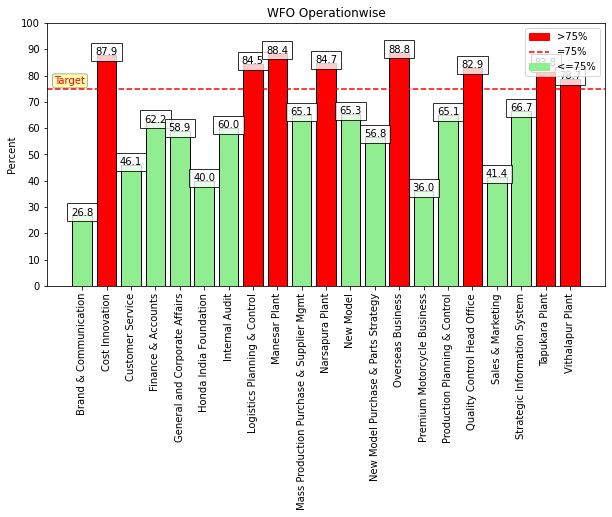

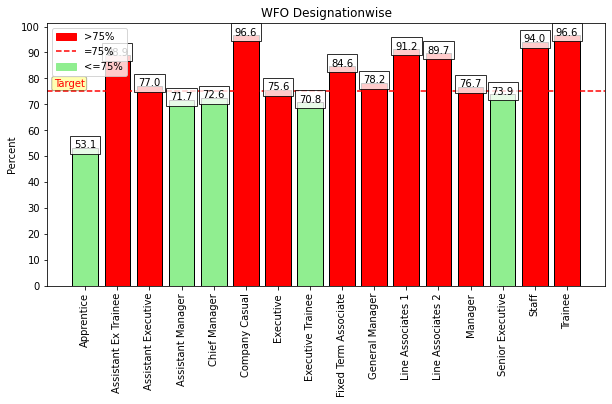

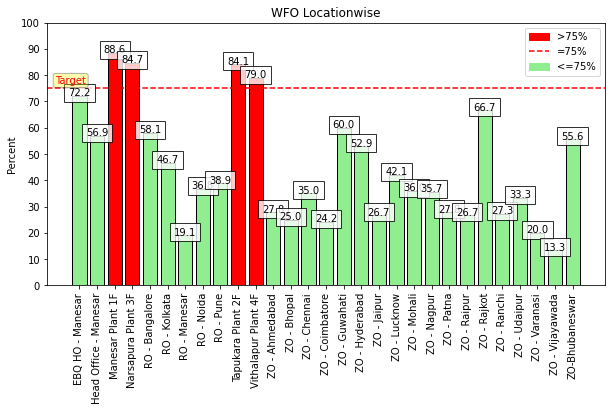

In [ ]:
from matplotlib.axis import mlines
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha =.8))
def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def colorLogic(result_wfo_operation_list2):
  l=[]
  for i in result_wfo_operation_list2:
    if (i<=75):
      l.append('lightgreen')
    else:
      l.append('red')

  return l



if len(result_wfo_operation['Operation'])>1:
  result_wfo_operation_list = list(result_wfo_operation['Operation'])
  result_wfo_operation_list2 = list(result_wfo_operation['Percent'])
  plt.figure(figsize=(10, 5)) 
  plt.bar(result_wfo_operation_list, result_wfo_operation_list2, color = colorLogic(result_wfo_operation_list2),edgecolor='black')
  addlabels(result_wfo_operation_list, result_wfo_operation_list2)
  plt.title('WFO Operationwise')
  plt.xticks(result_wfo_operation_list, rotation ='vertical')
  plt.yticks(range(0, 110, 10))
  plt.ylabel('Percent')
  plt.subplots_adjust(bottom = 0.15)
  plt.axhline(y=75, xmin=0, xmax= 1,linestyle='--',color='red')
  blue_patch = mpatches.Patch(color='lightgreen', label='<=75%')
  blue_line = mlines.Line2D([],[],color='red', label='=75%',linestyle='--')
  red_patch = mpatches.Patch(color='red', label='>75%')
  plt.legend(handles=[red_patch,blue_line,blue_patch])
  plt.annotate("Target", xy=(-0.5, 78), xycoords='data', color='red',ha="center", va="center", bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
  plt.savefig('WFO_Operationwise.png',bbox_inches="tight")
  

if len(result_wfo_designation['Designation'])>1:
  result_wfo_designation_list = list(result_wfo_designation['Designation'])
  result_wfo_designation_list2 = list(result_wfo_designation['Percent'])
  plt.figure(figsize=(10, 5)) 
  plt.bar(result_wfo_designation_list, result_wfo_designation_list2,color = colorLogic(result_wfo_designation_list2),edgecolor='black')
  addlabels(result_wfo_designation_list, result_wfo_designation_list2)
  plt.title('WFO Designationwise')
  plt.xticks(result_wfo_designation_list, rotation ='vertical')
  plt.yticks(range(0, 110, 10))
  plt.ylabel('Percent')
  plt.subplots_adjust(bottom = 0.15)
  plt.axhline(y=75, xmin=0, xmax= 1,linestyle='--',color='red')
  blue_patch = mpatches.Patch(color='lightgreen', label='<=75%')
  blue_line = mlines.Line2D([],[],color='red', label='=75%',linestyle='--')
  red_patch = mpatches.Patch(color='red', label='>75%')
  plt.annotate("Target", xy=(-0.5, 78), xycoords='data', color='red',ha="center", va="center", bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
  plt.legend(handles=[red_patch,blue_line,blue_patch])
  plt.savefig('WFO_Designationwise.png',bbox_inches="tight")

if len(result_wfo_location['Location'])>1:
  result_wfo_location_list = list(result_wfo_location['Location'])
  result_wfo_location_list2 = list(result_wfo_location['Percent'])
  plt.figure(figsize=(10, 5)) 
  plt.bar(result_wfo_location_list, result_wfo_location_list2, color = colorLogic(result_wfo_location_list2),edgecolor='black')
  addlabels(result_wfo_location_list, result_wfo_location_list2)
  plt.title('WFO Locationwise')
  plt.xticks(result_wfo_location_list, rotation ='vertical')
  plt.yticks(range(0, 110, 10))
  plt.ylabel('Percent')
  plt.subplots_adjust(bottom = 0.15)
  plt.axhline(y=75, xmin=0, xmax= 1,linestyle='--',color='red')
  blue_patch = mpatches.Patch(color='lightgreen', label='<=75%')
  blue_line = mlines.Line2D([],[], label='=75%',linestyle='--',color='red')
  red_patch = mpatches.Patch(color='red', label='>75%')
  plt.legend(handles=[red_patch,blue_line,blue_patch])
  plt.annotate("Target", xy=(-0.5, 78), xycoords='data', color='red',ha="center", va="center", bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
  plt.savefig('WFO_Locationwise.png',bbox_inches="tight")

In [ ]:
!pip install xlsxwriter
!pip install xlutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 13.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 6.3 MB/s eta 0:00:00


In [ ]:
from openpyxl import Workbook
import xlsxwriter
import os

def excelWriter():
  workbook = xlsxwriter.Workbook(r'WFO_Analysis.xlsx')
  with pd.ExcelWriter(r'WFO_Analysis.xlsx') as writer:
  #writer = r"C:\Users\Kartikey\Desktop\shorttt.xlsx"
  # write dataframe to excel
      if daydiff>10:
        result_wfo_associate.to_excel(writer,sheet_name='Associate wise WFO')
      result_wfo_operation.to_excel(writer,sheet_name='Operation_wise_WFO')
      result_wfo_division.to_excel(writer,sheet_name='Division wise WFO')
      result_wfo_location.to_excel(writer,sheet_name='Location wise WFO')
      result_wfo_designation.to_excel(writer,sheet_name='Designation wise WFO')
      result_wfo_department.to_excel(writer,sheet_name='Department wise WFO')
      workbook.close()
      
with ft.ThreadPoolExecutor() as executor:
  executor.submit(excelWriter).result()

In [ ]:
pnglist=['WFO_Operationwise.png','WFO_Locationwise.png','WFO_Designationwise.png']

In [ ]:
workbook = xlsxwriter.Workbook('WFO_Visualization.xlsx')
worksheet = workbook.add_worksheet('Visualization')
worksheet.insert_image('A2', 'WFO_Operationwise.png')
worksheet.insert_image('R2', 'WFO_Locationwise.png')
worksheet.insert_image('A40', 'WFO_Designationwise.png')
workbook.close()

In [ ]:
for i in pnglist:
  if os.path.isfile(i):
    os.remove(i)
  else:
    continue